<a href="https://colab.research.google.com/github/salmabk3/ADAS-Pedestrian-Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===== SETUP COLAB =====
#a chaque nouvelle session il faut executer cette partie
!pip install ultralytics opencv-python pandas

!git clone https://github.com/salmabk3/ADAS-Pedestrian-Detection.git
%cd ADAS-Pedestrian-Detection

import os, sys
sys.path.insert(0, os.path.abspath("src"))

from yolo import YoloDetector
print("✅ Environment ready")


Installation des dependances


In [7]:
!pip install ultralytics opencv-python pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.1 MB/s eta 0:00:00


Se connecter a google drive pour acceder au dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Cloner le projet github

In [3]:
!git clone https://github.com/salmabk3/ADAS-Pedestrian-Detection.git




Cloning into 'ADAS-Pedestrian-Detection'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 67 (delta 29), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (67/67), 594.02 KiB | 10.24 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [4]:
!ls


ADAS-Pedestrian-Detection  sample_data


In [5]:
%cd ADAS-Pedestrian-Detection
!pwd
!ls


/content/ADAS-Pedestrian-Detection
/content/ADAS-Pedestrian-Detection
data  main.ipynb  README.md  requirements.txt  src


In [9]:
# ===== IMPORT DES MODULES DU PROJET =====
import os
import sys

print("Current directory:", os.getcwd())
print("Project files:", os.listdir("."))

SRC_PATH = os.path.abspath("src")
print("SRC_PATH =", SRC_PATH)

sys.path.insert(0, SRC_PATH)

from yolo import YoloDetector

print("✅ Import YoloDetector OK")


Current directory: /content/ADAS-Pedestrian-Detection
Project files: ['src', 'README.md', 'requirements.txt', '.git', '.gitignore', 'data', 'main.ipynb']
SRC_PATH = /content/ADAS-Pedestrian-Detection/src
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Import YoloDetector OK



# Chargement des modèles

YOLO pour la détection de piétons

In [2]:
%cd /content
!pwd
!ls




/content
/content
sample_data


In [10]:
IMAGE_DIR = "/content/drive/MyDrive/ADAS-DATASET/images"
OUT_IMG   = "/content/drive/MyDrive/ADAS-DATASET/results/yolo_images"
OUT_CSV   = "/content/drive/MyDrive/ADAS-DATASET/results/yolo_csv"

os.makedirs(OUT_IMG, exist_ok=True)
os.makedirs(OUT_CSV, exist_ok=True)


In [13]:
import cv2
import pandas as pd

# Initialisation YOLO (pré-entraîné)
detector = YoloDetector(model_name="yolov8n.pt")

rows = []  # pour le CSV final

image_files = [f for f in os.listdir(IMAGE_DIR)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"🔎 Nombre total d'images : {len(image_files)}")

for img_name in image_files:
    img_path = os.path.join(IMAGE_DIR, img_name)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Image ignorée : {img_name}")
        continue

    boxes = detector.detect(img)

    for i, box in enumerate(boxes):
        x1, y1, x2, y2, conf, cls = box

        # Dessiner bounding box
        cv2.rectangle(img, (int(x1), int(y1)),
                           (int(x2), int(y2)),
                           (0, 255, 0), 2)

        cv2.putText(img, f"person {conf:.2f}",
                    (int(x1), int(y1) - 8),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 0), 2)

        # Enregistrer dans le CSV
        rows.append({
            "image": img_name,
            "bbox_id": i,
            "x1": float(x1),
            "y1": float(y1),
            "x2": float(x2),
            "y2": float(y2),
            "confidence": float(conf)
        })

    # Sauvegarder l'image annotée
    cv2.imwrite(os.path.join(OUT_IMG, img_name), img)

    print(f"{img_name} → {len(boxes)} piéton(s) détecté(s)")


Chargement de YOLO (yolov8n.pt)...
🔎 Nombre total d'images : 818
0000000002 (1).png → 0 piéton(s) détecté(s)
0000000001 (1).png → 0 piéton(s) détecté(s)
0000000005 (1).png → 0 piéton(s) détecté(s)
0000000007 (1).png → 0 piéton(s) détecté(s)
0000000011 (1).png → 1 piéton(s) détecté(s)
0000000012 (1).png → 1 piéton(s) détecté(s)
0000000013 (1).png → 1 piéton(s) détecté(s)
0000000014 (1).png → 0 piéton(s) détecté(s)
0000000015 (1).png → 0 piéton(s) détecté(s)
0000000016 (1).png → 0 piéton(s) détecté(s)
0000000017 (1).png → 1 piéton(s) détecté(s)
0000000018 (1).png → 1 piéton(s) détecté(s)
0000000019 (1).png → 2 piéton(s) détecté(s)
0000000020 (1).png → 1 piéton(s) détecté(s)
0000000025 (2).png → 2 piéton(s) détecté(s)
0000000025 (1).png → 1 piéton(s) détecté(s)
0000000021 (1).png → 1 piéton(s) détecté(s)
0000000022 (1).png → 1 piéton(s) détecté(s)
0000000024 (2).png → 1 piéton(s) détecté(s)
0000000024 (1).png → 1 piéton(s) détecté(s)
0000000023 (1).png → 1 piéton(s) détecté(s)
0000000026 

Vérification VISUELLE d’une image avec YOLO

Nombre de piétons détectés : 1


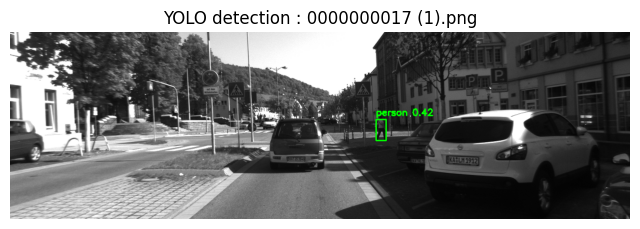

In [17]:
import cv2
import matplotlib.pyplot as plt
import os

# Chemins
IMAGE_NAME = "0000000017 (1).png"
IMAGE_PATH = os.path.join(IMAGE_DIR, IMAGE_NAME)

# Charger l'image
img = cv2.imread(IMAGE_PATH)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Détection YOLO
boxes = detector.detect(img)

print(f"Nombre de piétons détectés : {len(boxes)}")

# Dessiner les bounding boxes
for box in boxes:
    x1, y1, x2, y2, conf, cls = box
    cv2.rectangle(
        img_rgb,
        (int(x1), int(y1)),
        (int(x2), int(y2)),
        (0, 255, 0),
        2
    )
    cv2.putText(
        img_rgb,
        f"person {conf:.2f}",
        (int(x1), int(y1) - 8),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0, 255, 0),
        2
    )

# Affichage
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"YOLO detection : {IMAGE_NAME}")
plt.show()


In [ ]:
df = pd.DataFrame(rows)
csv_path = os.path.join(OUT_CSV, "yolo_detections.csv")
df.to_csv(csv_path, index=False)

print(f"Résultats sauvegardés : {csv_path}")
print(f"Nombre total de détections : {len(df)}")
